## Cleaning the points data

The points file from the City already went through their cleaning with the following criteria:

- Bounded to Kelowna
- local time zone was set to Vancouver
- minimum number of trip points = 3
- minimum segment length (metres) = 20
- minimum trip length (metres) = 150
- maximum trip length (metres) = 20000
- minimum trip duration (sec) = 120
- maximum trip duration (sec) = 10800 (3 hrs)
- maximum average trip speed (m/s) = 20/3.6 (20 km/h converted to m/s)
- maximum trip segment speed (m/s) = 30/3.6 (30 km/h converted to m/s)
- maximum fast segments = 0.1  # 10% of segments can exceed max_trip_segment_speed



These points were identified, but not removed from the file. All those extra columns are the identification of whether a point exceeded one of the the defined maximum or minimum.

We need to redefine the boundaries are remove trips that violate the following:

- minimum number of trip points = 3
- minimum trip length (metres) = 150
- maximum trip length (metres) = 20000
- minimum trip duration (sec) = 120 (2 minutes)
- maximum trip duration (sec) = 10800 (3 hrs)
- maximum average trip speed (m/s) = 20/3.6 (20 km/h converted to m/s)
- maximum trip segment speed (m/s) = 30/3.6 (30 km/h converted to m/s)
- maximum fast segments = 0.1  # 10% of segments can exceed max_trip_segment_speed

**This code is intentionally modular in case we need to experiment with what we take out.**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('/Users/lizawood/UBC/Bikeshare/trip_points - consolidated - 0611_0909-points.csv')
df=df.sort_values(by=['trip_id','pointtime']) # sort data
df.head()

,trip_id,pointtime,tripstarttime,tripendtime,lon,lat,m,pointdist,pointdur,pointspeed,...,perr_shortseg,perr_fastseg,terr_boundbox,terr_fewpoints,terr_distlong,terr_distshort,terr_durshort,terr_durlong,terr_fast,terr_fastsegs
0,0003663e-33e0-4945-a082-cac7c40d24f8,2018-07-06 17:18:27.001000,0,0,-119.496511,49.893530,1,0.0,0.000,0.0,...,0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0
1,0003663e-33e0-4945-a082-cac7c40d24f8,2018-07-06 17:28:14.011000,0,0,-119.498258,49.886142,2,831.2,587.010,1.4,...,0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0
2,00066e1e-ae6d-4d23-9fc3-69585c34100b,2018-07-29 19:53:25.692000,0,0,-119.473100,49.886125,1,0.0,0.000,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,00066e1e-ae6d-4d23-9fc3-69585c34100b,2018-07-29 19:54:36,0,0,-119.474051,49.886237,2,69.4,70.308,1.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,00066e1e-ae6d-4d23-9fc3-69585c34100b,2018-07-29 20:04:19.908000,0,0,-119.476657,49.885634,3,198.5,583.908,0.3,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Remove trips that go outside of Kelowna

In [3]:
# Starting number of rows

df.shape

(292035, 24)

In [4]:
# Full list of columns and data types

df.dtypes

trip_id            object
pointtime          object
tripstarttime       int64
tripendtime         int64
lon               float64
lat               float64
m                   int64
pointdist         float64
pointdur          float64
pointspeed        float64
tipdist           float64
tripdur           float64
tripspeed         float64
perr_boundbox        bool
perr_shortseg       int64
perr_fastseg      float64
terr_boundbox     float64
terr_fewpoints      int64
terr_distlong     float64
terr_distshort    float64
terr_durshort     float64
terr_durlong      float64
terr_fast         float64
terr_fastsegs     float64
dtype: object

In [5]:
# perr_boundbox is a boolean indicating whether a trip is within Kelowna/West Kelowna boundaries

df = df[df.perr_boundbox]
df.shape

(276919, 24)

In [6]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

22153

### Remove trips with less than 3 points

In [7]:
# remove trips with less than 3 points

#df = df.groupby('trip_id').filter(lambda x: x['trip_id'].count() >= 3) 
df = df[df['terr_fewpoints']==0]  #filtering what was already identified
df.shape

(267101, 24)

In [8]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

14353

### Remove trips that are too long (distance)

In [9]:
df = df[df['terr_distlong']==0]
df.shape

(199478, 24)

In [10]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

13952

### Remove trips that are too short (distance)

In [11]:
df = df[df['terr_distshort']==0]
df.shape

(198237, 24)

In [12]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

13606

### Remove trips that are too long (time)

In [13]:
df = df[df['terr_durlong']==0]
df.shape

(161770, 24)

In [14]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

12050

### Remove trips that are too short (time)

In [15]:
df = df[df['terr_durshort']==0]
df.shape

(160978, 24)

In [16]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

11941

### Remove trips that exceed the maximum average speed

In [17]:
df = df[df['terr_fast']==0]
df.shape

(155512, 24)

In [18]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

11745

### Remove trips that have segments that are too fast (noise)

In [19]:
df = df[df['terr_fastsegs']==0]
df.shape

(97110, 24)

In [20]:
# Count how many total unique trip IDs we have at this point:

df.trip_id.nunique()

8853

In [21]:
# Export as CSV:

df.to_csv("Downtown_points_0611_0909_partly_clean.csv")

## Trip Statistics

### Distribution of frequency of GPS Updates

In [22]:
# Calculate the time between points for each trip and convert to seconds:

df['time']=pd.to_datetime(df['pointtime'])
df = df[['trip_id','time','lon','lat']] 
df['lon_shifted']= df.groupby('trip_id')['lon'].shift(-1)  
df['lat_shifted'] = df.groupby('trip_id')['lat'].shift(-1) 
df['next_time'] = df.groupby('trip_id')['time'].shift(-1)
df.dropna(axis=0, how='any', inplace=True)
df['update_time']= df['next_time'] - df['time']
df['seconds'] = df['update_time'].dt.total_seconds() #I'll deal with warnings later
df['minutes'] = df['update_time'].dt.total_seconds().div(60).astype(int)
df.head()

,trip_id,time,lon,lat,lon_shifted,lat_shifted,next_time,update_time,seconds,minutes
2,00066e1e-ae6d-4d23-9fc3-69585c34100b,2018-07-29 19:53:25.692,-119.473100,49.886125,-119.474051,49.886237,2018-07-29 19:54:36.000,00:01:10.308000,70.308,1
3,00066e1e-ae6d-4d23-9fc3-69585c34100b,2018-07-29 19:54:36.000,-119.474051,49.886237,-119.476657,49.885634,2018-07-29 20:04:19.908,00:09:43.908000,583.908,9
5,0011fa6a-ba9c-4a10-a35d-1be8b961d1e6,2018-07-03 18:25:00.999,-119.488891,49.886181,-119.492047,49.886383,2018-07-03 18:33:02.464,00:08:01.465000,481.465,8
6,0011fa6a-ba9c-4a10-a35d-1be8b961d1e6,2018-07-03 18:33:02.464,-119.492047,49.886383,-119.493427,49.886508,2018-07-03 18:34:49.000,00:01:46.536000,106.536,1
7,0011fa6a-ba9c-4a10-a35d-1be8b961d1e6,2018-07-03 18:34:49.000,-119.493427,49.886508,-119.494819,49.886571,2018-07-03 18:36:19.999,00:01:30.999000,90.999,1


Calculate the average between points per trip ID.

In [23]:
grouped = df.groupby('trip_id').mean()[['minutes']]
grouped.head()

,minutes
trip_id,
00066e1e-ae6d-4d23-9fc3-69585c34100b,5.000000
0011fa6a-ba9c-4a10-a35d-1be8b961d1e6,2.750000
00144b51-4e32-4f53-a8d5-0ce530d58054,0.750000
0014c5d9-5b35-4a65-9d41-a755db8b90a5,1.125000
001658cc-b108-40f3-9c51-d778f43eb340,1.333333


Text(0, 0.5, 'Count')

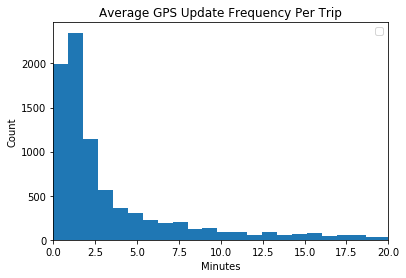

In [33]:
import matplotlib.pyplot as plt

grouped.plot.hist(bins = 100)
plt.xlim(0,20)
plt.legend('')
plt.title('Average GPS Update Frequency Per Trip')
plt.xlabel('Minutes')
plt.ylabel('Count')

In [ ]:
grouped.seconds.describe()

In [ ]:
boxplot = grouped.boxplot(column=['seconds'])

In [ ]:
# With outliers removed

boxplot = grouped.boxplot(column=['seconds'], showcaps=True, showfliers=False)

## Filter the `trip_id` that go through downtown Kelowna

The cleaning below ultimately wasn't used since we used distance from node to remove GPS points in the lake and trips outside Kelowna. However, the code below is useful if you want to just extract trips that pass through or are confined to downtown Kelowna.

### Trips that pass through downtown

In [ ]:
# Create a new dataframe with trip id's that pass through downtown 

north, south, east, west = 49.897, 49.879,-119.482, -119.505 

df1 = dfkeep[(dfkeep.lat< north) & (dfkeep.lat>south) & (dfkeep.lon< east) & (dfkeep.lon>west)]

df1.shape

In [ ]:
# Count how many total unique trip IDs we have at this point:

df1.trip_id.nunique()

In [ ]:
# remove trips with less than 3 points

df1 = df1.groupby('trip_id').filter(lambda x: x['trip_id'].count() >= 3) 
df1.trip_id.nunique()

In [ ]:
# Export as CSV file

df1.to_csv("Downtown_points_0611_0909_clean.csv")

In [ ]:
# Verify the original data frame still contains all the previous trip id's

df.trip_id.nunique()

In [ ]:
# Filter the original data set by this final list of trip_id's!

trips = df.trip_id.isin(df1.trip_id)
dftrips = df[trips]

In [ ]:
# Verify we have filtered based on the trip IDs in df1

dftrips.trip_id.nunique()

In [ ]:
# Export as CSV file

dftrips.to_csv("Downtown_points_0611_0909_clean_all.csv")

### Trips that are completely contained within downtown

In [ ]:
# Confirm we still have the original trips in df

df.trip_id.nunique()

In [ ]:
#Filter trips that are confined to downtown (never leave)

dflat = dfkeep.groupby('trip_id').filter(lambda x: ((x.lat < north) & (x.lat > south)).all())
dfdt = dflat.groupby('trip_id').filter(lambda x: ((x.lon < east) & (x.lon > west)).all())

dfdt.shape

In [ ]:
dfdt.trip_id.nunique()

In [ ]:
# remove trips with less than 3 points

dfdt = dfdt.groupby('trip_id').filter(lambda x: x['trip_id'].count() >= 3) 
dfdt.trip_id.nunique()

In [ ]:
# Export as CSV file

dfdt.to_csv("Downtown_points_0611_0909_clean_dtonly.csv")